In [1]:
# importing the required modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from time import perf_counter 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
import cv2
import numpy as np

In [2]:
# Defining the paths to the data folders
train_dir = '../data/train'
test_dir = '../data/test'
valid_dir = '../data/valid'

In [3]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Load the train data
train_data = datagen.flow_from_directory(train_dir, 
                                         target_size=(416, 416), # Adjust to your image size
                                         class_mode='categorical')

# Load the validation data
valid_data = datagen.flow_from_directory(valid_dir, 
                                         target_size=(416, 416), 
                                         class_mode='categorical')

# Load the test data
test_data = datagen.flow_from_directory(test_dir, 
                                        target_size=(416, 416), 
                                        class_mode='categorical', 
                                        shuffle=False)  # No need to shuffle test data

Found 1300 images belonging to 13 classes.
Found 260 images belonging to 13 classes.
Found 26 images belonging to 13 classes.


In [5]:
from keras.layers import Input

In [6]:
model = Sequential([
    Input(shape=(416,416,3)),
    
    Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    
    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Flatten(),
    Dense(units=128,activation='relu'),
    Dense(units=13,activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 416, 416, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 208, 208, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 208, 208, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 104, 104, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 104, 104, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    22,151,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,176,557 (84.60 MB)

 Trainable params: 22,176,557 (84.60 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"],
              )

In [9]:
import keras

In [10]:
epochs = 50
checkpoint_filepath = '../models/checkpoint.model.keras'

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

accuracy_metrics = model.fit(
    x=train_data,
    epochs=epochs,
    validation_data=valid_data,
    batch_size=20,
    callbacks=[model_checkpoint_callback])

Epoch 1/50


c:\Users\admin\dataScienceBootcamp\my_eda_project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.1164 - loss: 3.2776 - val_accuracy: 0.1308 - val_loss: 2.6825
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.5836 - loss: 1.3383 - val_accuracy: 0.3000 - val_loss: 2.8947
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9437 - loss: 0.2544 - val_accuracy: 0.2923 - val_loss: 4.2311
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9879 - loss: 0.0599 - val_accuracy: 0.2923 - val_loss: 4.5736
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9994 - loss: 0.0096 - val_accuracy: 0.3038 - val_loss: 4.9399
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.3038 - val_loss: 5.1492
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 1.0000 - loss: 6.5935e-04 - val_accuracy: 0.3038 - val_loss: 5.3987
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 1.0000 - loss: 3.5333e-04 - val_accuracy: 0.3038 - val_loss: 5.

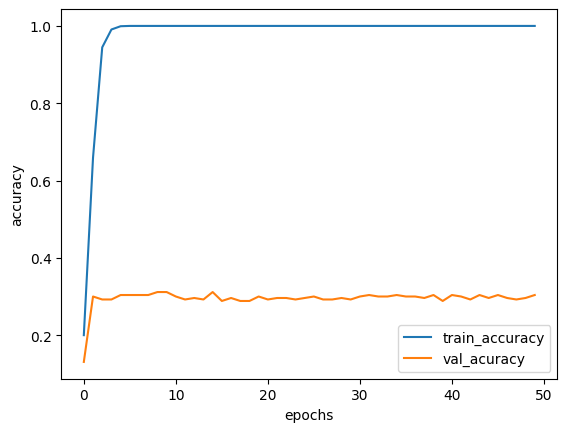

In [11]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [12]:
print(f"At the end of the {epochs}th epoch the validation accuracy has reached {'{:.4f}'.format(accuracy_metrics.history['val_accuracy'][-1])}")

At the end of the 50th epoch the validation accuracy has reached 0.3038


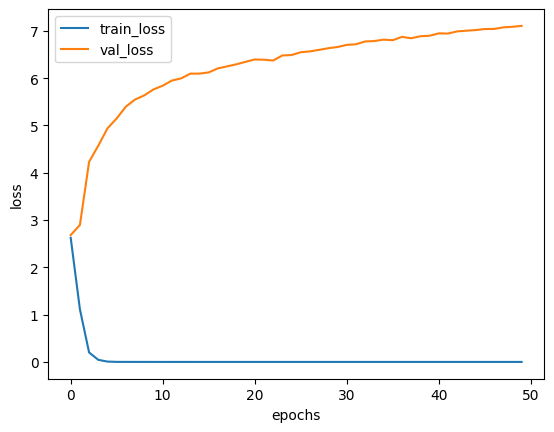

In [13]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['loss'],label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [14]:
print(f"At the end of the {epochs}th epoch the validation loss has decreased to {'{:.4f}'.format(accuracy_metrics.history['val_loss'][-1])}")

At the end of the 50th epoch the validation loss has decreased to 7.1046


In [15]:
model.save('models/baseCNN_reluAdam.h5')

In [16]:
model.save('models/baseCNN_reluAdam.keras')